#pd.set_option('display.max_rows', None)

In [1]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

NameError: name 'pd' is not defined

# SPECIES SPECIFIC INSIGHTS

## Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Target search for P2X4 protein
target = new_client.target
target_query = target.search('p2x4')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,P2X purinoceptor 4,20.0,False,CHEMBL2176849,"[{'accession': 'Q9JJX6', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'Q99571', 'xref_name': None, 'xre...",Homo sapiens,P2X purinoceptor 4,16.0,False,CHEMBL2104,"[{'accession': 'Q99571', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P51577', 'xref_name': None, 'xre...",Rattus norvegicus,P2X purinoceptor 4,16.0,False,CHEMBL2818,"[{'accession': 'P51577', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Homo sapiens,P2X receptor,7.0,False,CHEMBL4524012,"[{'accession': 'P51575', 'component_descriptio...",PROTEIN FAMILY,9606
4,[],Rattus norvegicus,P2X receptor,7.0,False,CHEMBL4524013,"[{'accession': 'P51579', 'component_descriptio...",PROTEIN FAMILY,10116


In [3]:
target1 = targets.target_chembl_id[1] # human
target2 = targets.target_chembl_id[0] # mouse
target3 = targets.target_chembl_id[2] # rat

In [4]:
activity = new_client.activity
res1 = activity.filter(target_chembl_id=target1).filter(standard_type="IC50") # human
res2 = activity.filter(target_chembl_id=target2).filter(standard_type="IC50") # mouse
res3 = activity.filter(target_chembl_id=target3).filter(standard_type="IC50") # rat

In [5]:
df_human = pd.DataFrame.from_dict(res1)
df_mouse = pd.DataFrame.from_dict(res2)
df_rat = pd.DataFrame.from_dict(res3)

In [6]:
df_human = df_human[df_human.standard_value.notna()]
df_human = df_human[df_human.canonical_smiles.notna()]
df_human = df_human.drop_duplicates(['canonical_smiles'])
df_human

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,39959,[],CHEMBL750984,The compound was evaluated for antagonist acti...,F,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,nM,UO_0000065,None,100000.0
1,None,None,1075404,[],CHEMBL751124,Inhibition of inward ion current elicited by A...,F,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,uM,UO_0000065,None,27.5
2,None,None,1610564,[],CHEMBL872178,Inhibitory concentration against human P2X pur...,F,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,Log IC50,None,UO_0000065,None,-6.0
3,None,None,2271933,[],CHEMBL1017979,Antagonist activity at P2X4 receptor up to 10 uM,F,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,uM,UO_0000065,None,10.0
4,None,None,2272037,[],CHEMBL960840,Inhibition of P2X4 receptor,B,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"{'action_type': 'ANTAGONIST', 'description': '...",None,24821338,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140232,Antagonist activity against human P2X4R stably...,B,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,uM,UO_0000065,None,14.26
301,"{'action_type': 'ANTAGONIST', 'description': '...",None,24821339,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140232,Antagonist activity against human P2X4R stably...,B,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,uM,UO_0000065,None,14.26
302,"{'action_type': 'ANTAGONIST', 'description': '...",None,24821340,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140232,Antagonist activity against human P2X4R stably...,B,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.039
303,"{'action_type': 'ANTAGONIST', 'description': '...",None,24821341,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5140232,Antagonist activity against human P2X4R stably...,B,None,None,BAO_0000190,...,Homo sapiens,P2X purinoceptor 4,9606,None,None,IC50,uM,UO_0000065,None,0.935


In [7]:
df_human.standard_value.describe()

count          258
unique         169
top       100000.0
freq            41
Name: standard_value, dtype: object

In [8]:
df_human['standard_units'].unique()

array(['nM'], dtype=object)

In [9]:
df_human['standard_type'].unique()

array(['IC50'], dtype=object)

In [10]:
df_mouse = df_mouse[df_mouse.standard_value.notna()]
df_mouse = df_mouse[df_mouse.canonical_smiles.notna()]
df_mouse = df_mouse.drop_duplicates(['canonical_smiles'])
df_mouse

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1075405,[],CHEMBL751125,Inhibition of inward ion current elicited by A...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,21.0
1,None,None,12148185,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,2.66
2,None,None,12148186,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,2.81
3,None,None,12148187,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,1.77
4,None,None,12148188,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,10.0
5,None,None,12148189,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,2.71
6,None,None,12148190,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,10.0
7,None,None,12148191,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,1.76
8,None,None,12148192,[],CHEMBL2184469,Antagonist activity at mouse P2X4 receptor by ...,F,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,1.28
9,None,None,13885097,[],CHEMBL3106338,Antagonist activity at mouse P2X4 receptor ass...,B,None,None,BAO_0000190,...,Mus musculus,P2X purinoceptor 4,10090,None,None,IC50,uM,UO_0000065,None,14.9


In [11]:
df_mouse['standard_type'].unique()

array(['IC50'], dtype=object)

In [12]:
df_mouse['standard_units'].unique()

array(['nM'], dtype=object)

In [13]:
df_rat = df_rat[df_rat.standard_value.notna()]
df_rat = df_rat[df_rat.canonical_smiles.notna()]
df_rat = df_rat.drop_duplicates(['canonical_smiles'])
df_rat

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
1,None,None,48471,[],CHEMBL750988,The compound was evaluated for antagonist acti...,F,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,nM,UO_0000065,None,100000.0
2,None,None,66536,[],CHEMBL759520,The compound was evaluated for antagonist acti...,F,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,uM,UO_0000065,None,9.6
3,None,None,1075400,[],CHEMBL751127,Inhibition of inward ion current elicited by A...,F,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,uM,UO_0000065,None,500.0
5,None,None,1610572,[],CHEMBL872171,Inhibitory concentration against rat P2X purin...,F,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,Log IC50,None,UO_0000065,None,-7.09
7,None,None,5208507,[],CHEMBL1680809,Antagonist activity against rat P2X4 receptor ...,F,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,None,None,13885092,[],CHEMBL3108481,Antagonist activity at rat P2X4 receptor asses...,B,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,uM,UO_0000065,None,95.8
82,None,None,13885093,[],CHEMBL3108481,Antagonist activity at rat P2X4 receptor asses...,B,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,uM,UO_0000065,None,109.0
83,None,None,13885094,[],CHEMBL3108481,Antagonist activity at rat P2X4 receptor asses...,B,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,uM,UO_0000065,None,43.0
84,None,None,18926323,[],CHEMBL4324780,Antagonist activity at rat P2X4 receptor tranf...,B,None,None,BAO_0000190,...,Rattus norvegicus,P2X purinoceptor 4,10116,None,None,IC50,nM,UO_0000065,None,233.0


In [14]:
df_rat['standard_type'].unique()

array(['IC50'], dtype=object)

In [15]:
df_rat['standard_units'].unique()

array(['nM'], dtype=object)

In [16]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_human = df_human[selection]
df_mouse = df_mouse[selection]
df_rat = df_rat[selection]

In [17]:
df_human.reset_index(inplace=True)
df_mouse.reset_index(inplace=True)
df_rat.reset_index(inplace=True)

In [18]:
df_human

,index,molecule_chembl_id,canonical_smiles,standard_value
0,0,CHEMBL216504,O=C(Nc1cccc(C(=O)Nc2ccc(S(=O)(=O)[O-])c3cc(S(=...,100000.0
1,1,CHEMBL69234,Cc1nc(/N=N/c2ccc(S(=O)(=O)O)cc2S(=O)(=O)O)c(CO...,27500.0
2,2,CHEMBL413145,O=C(Nc1cccc(C(=O)Nc2cc(C(=O)Nc3ccc(S(=O)(=O)[O...,1000.0
3,3,CHEMBL494161,COc1cc(C(C)C)c(Oc2cnc(NC(CO)CO)nc2N)cc1I,10000.0
4,4,CHEMBL526307,COc1cc(C(C)C)c(Oc2cnc(N)nc2N)cc1I,10000.0
...,...,...,...,...
253,300,CHEMBL5177180,O=C(NC(=S)Nc1ccc(Br)cc1)c1ccc2c(c1)OCO2,14260.0
254,301,CHEMBL5191639,Cc1cc(Br)ccc1NC(=S)NC(=O)c1ccc2c(c1)OCO2,14260.0
255,302,CHEMBL5206892,CC(C)c1ccc(NC(=S)NC(=O)c2ccc3c(c2)OCO3)c(Br)c1,39.0
256,303,CHEMBL5205239,O=C(NC(=S)Nc1cccnc1Cl)c1ccc2c(c1)OCO2,935.0


In [19]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [20]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [21]:
df_human.standard_value.describe()

count          258
unique         169
top       100000.0
freq            41
Name: standard_value, dtype: object

In [22]:
df_human['standard_value'] = df_human['standard_value'].astype(float)
df_mouse['standard_value'] = df_mouse['standard_value'].astype(float)
df_rat['standard_value'] = df_rat['standard_value'].astype(float)

<ipython-input-22-a6c91fa53b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human['standard_value'] = df_human['standard_value'].astype(float)
<ipython-input-22-a6c91fa53b29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['standard_value'] = df_mouse['standard_value'].astype(float)
<ipython-input-22-a6c91fa53b29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [23]:
df_norm1 = norm_value(df_human)
df_norm2 = norm_value(df_mouse)
df_norm3 = norm_value(df_rat)

<ipython-input-20-5b44499df3ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['standard_value_norm'] = norm
<ipython-input-20-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)
<ipython-input-20-5b44499df3ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['standard_value_norm'] = norm
<ipython-input-20-5b44499df3ba>:10: FutureWarning: In a future version o

In [24]:
df_human = pIC50(df_norm1)
df_mouse = pIC50(df_norm2)
df_rat = pIC50(df_norm3)

<ipython-input-19-c0835655dc17>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)
<ipython-input-19-c0835655dc17>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)
<ipython-input-19-c0835655dc17>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


In [25]:
df_human

,index,molecule_chembl_id,canonical_smiles,pIC50
0,0,CHEMBL216504,O=C(Nc1cccc(C(=O)Nc2ccc(S(=O)(=O)[O-])c3cc(S(=...,4.000000
1,1,CHEMBL69234,Cc1nc(/N=N/c2ccc(S(=O)(=O)O)cc2S(=O)(=O)O)c(CO...,4.560667
2,2,CHEMBL413145,O=C(Nc1cccc(C(=O)Nc2cc(C(=O)Nc3ccc(S(=O)(=O)[O...,6.000000
3,3,CHEMBL494161,COc1cc(C(C)C)c(Oc2cnc(NC(CO)CO)nc2N)cc1I,5.000000
4,4,CHEMBL526307,COc1cc(C(C)C)c(Oc2cnc(N)nc2N)cc1I,5.000000
...,...,...,...,...
253,300,CHEMBL5177180,O=C(NC(=S)Nc1ccc(Br)cc1)c1ccc2c(c1)OCO2,4.845880
254,301,CHEMBL5191639,Cc1cc(Br)ccc1NC(=S)NC(=O)c1ccc2c(c1)OCO2,4.845880
255,302,CHEMBL5206892,CC(C)c1ccc(NC(=S)NC(=O)c2ccc3c(c2)OCO3)c(Br)c1,7.408935
256,303,CHEMBL5205239,O=C(NC(=S)Nc1cccnc1Cl)c1ccc2c(c1)OCO2,6.029188


In [26]:
# First, make sure 'canonical_smiles' is set as the index for all dataframes for easy comparison
df_human.set_index('canonical_smiles', inplace=True)
df_mouse.set_index('canonical_smiles', inplace=True)
df_rat.set_index('canonical_smiles', inplace=True)

In [27]:
# Then, use the `join` function to join on the 'canonical_smiles' index
# Only those 'canonical_smiles' present in all dataframes will be kept
df_human_mouse = df_human.join(df_mouse, how='inner', lsuffix='_human', rsuffix='_mouse')
df_human_rat = df_human.join(df_rat, how='inner', lsuffix='_human', rsuffix='_rat')
df_mouse_rat = df_mouse.join(df_rat, how='inner', lsuffix='_mouse', rsuffix='_rat')

df_human_mouse_rat = df_human_mouse.join(df_rat, how='inner', rsuffix='_rat')

In [28]:
# Reset index if desired
df_human_mouse.reset_index(inplace=True)
df_human_rat.reset_index(inplace=True)
df_mouse_rat.reset_index(inplace=True)

df_human_mouse_rat.reset_index(inplace=True)

In [29]:
df_human_mouse

,canonical_smiles,index_human,molecule_chembl_id_human,pIC50_human,index_mouse,molecule_chembl_id_mouse,pIC50_mouse
0,Cc1nc(/N=N/c2ccc(S(=O)(=O)O)cc2S(=O)(=O)O)c(CO...,1,CHEMBL69234,4.560667,0,CHEMBL69234,4.677781
1,OC1(c2ccccc2)c2ccccc2N(Cc2ccccc2)c2ccccc21,16,CHEMBL2180149,5.612610,1,CHEMBL2180149,5.575118
2,Cc1ccc(COC(=O)N2c3ccccc3Oc3ccccc32)cc1,29,CHEMBL2180138,5.642065,2,CHEMBL2180138,5.551294
3,O=C(OCc1ccccc1)N1c2ccccc2Oc2ccccc21,30,CHEMBL2180137,6.723538,3,CHEMBL2180137,5.752027
4,CC(C)OC(=O)N1c2ccccc2Oc2ccccc21,31,CHEMBL2180136,5.628932,4,CHEMBL2180136,5.000000
5,CCCN(CCC)C(=O)N1c2ccccc2Oc2ccccc21,37,CHEMBL2180174,5.570248,5,CHEMBL2180174,5.567031
6,O=C(NCCc1ccccc1)N1c2ccccc2Oc2ccccc21,40,CHEMBL2180171,5.749580,6,CHEMBL2180171,5.000000
7,Cc1ccc(S(=O)(=O)N2c3ccccc3Oc3ccccc32)cc1,51,CHEMBL2180160,5.860121,7,CHEMBL2180160,5.754487
8,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,62,CHEMBL1163419,4.818156,8,CHEMBL1163419,5.892790
9,CC(C)N(C(=O)N1c2ccccc2C=Cc2ccccc21)C(C)C,84,CHEMBL3103385,5.463442,9,CHEMBL3103385,4.826814


In [30]:
df_human_rat

,canonical_smiles,index_human,molecule_chembl_id_human,pIC50_human,index_rat,molecule_chembl_id_rat,pIC50_rat
0,Cc1nc(/N=N/c2ccc(S(=O)(=O)O)cc2S(=O)(=O)O)c(CO...,1,CHEMBL69234,4.560667,3,CHEMBL69234,3.301030
1,O=C(Nc1cccc(C(=O)Nc2cc(C(=O)Nc3ccc(S(=O)(=O)[O...,2,CHEMBL413145,6.000000,5,CHEMBL413145,7.090016
2,OC1(c2ccccc2)c2ccccc2N(Cc2ccccc2)c2ccccc21,16,CHEMBL2180149,5.612610,69,CHEMBL2180149,5.393619
3,Cc1ccc(COC(=O)N2c3ccccc3Oc3ccccc32)cc1,29,CHEMBL2180138,5.642065,70,CHEMBL2180138,5.000000
4,O=C(OCc1ccccc1)N1c2ccccc2Oc2ccccc21,30,CHEMBL2180137,6.723538,71,CHEMBL2180137,5.677781
5,CC(C)OC(=O)N1c2ccccc2Oc2ccccc21,31,CHEMBL2180136,5.628932,72,CHEMBL2180136,5.216096
6,CCCN(CCC)C(=O)N1c2ccccc2Oc2ccccc21,37,CHEMBL2180174,5.570248,73,CHEMBL2180174,5.000000
7,O=C(NCCc1ccccc1)N1c2ccccc2Oc2ccccc21,40,CHEMBL2180171,5.749580,74,CHEMBL2180171,5.000000
8,Cc1ccc(S(=O)(=O)N2c3ccccc3Oc3ccccc32)cc1,51,CHEMBL2180160,5.860121,75,CHEMBL2180160,6.032452
9,O=C1CN=C(c2cccc(Br)c2)c2oc3ccccc3c2N1,60,CHEMBL2180179,6.301030,86,CHEMBL2180179,6.124939


In [31]:
df_mouse_rat

,canonical_smiles,index_mouse,molecule_chembl_id_mouse,pIC50_mouse,index_rat,molecule_chembl_id_rat,pIC50_rat
0,Cc1nc(/N=N/c2ccc(S(=O)(=O)O)cc2S(=O)(=O)O)c(CO...,0,CHEMBL69234,4.677781,3,CHEMBL69234,3.301030
1,OC1(c2ccccc2)c2ccccc2N(Cc2ccccc2)c2ccccc21,1,CHEMBL2180149,5.575118,69,CHEMBL2180149,5.393619
2,Cc1ccc(COC(=O)N2c3ccccc3Oc3ccccc32)cc1,2,CHEMBL2180138,5.551294,70,CHEMBL2180138,5.000000
3,O=C(OCc1ccccc1)N1c2ccccc2Oc2ccccc21,3,CHEMBL2180137,5.752027,71,CHEMBL2180137,5.677781
4,CC(C)OC(=O)N1c2ccccc2Oc2ccccc21,4,CHEMBL2180136,5.000000,72,CHEMBL2180136,5.216096
5,CCCN(CCC)C(=O)N1c2ccccc2Oc2ccccc21,5,CHEMBL2180174,5.567031,73,CHEMBL2180174,5.000000
6,O=C(NCCc1ccccc1)N1c2ccccc2Oc2ccccc21,6,CHEMBL2180171,5.000000,74,CHEMBL2180171,5.000000
7,Cc1ccc(S(=O)(=O)N2c3ccccc3Oc3ccccc32)cc1,7,CHEMBL2180160,5.754487,75,CHEMBL2180160,6.032452
8,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,8,CHEMBL1163419,5.892790,77,CHEMBL1163419,5.326979
9,CC(C)N(C(=O)N1c2ccccc2C=Cc2ccccc21)C(C)C,9,CHEMBL3103385,4.826814,78,CHEMBL3103385,4.262807


In [32]:
df_human_mouse_rat

,canonical_smiles,index_human,molecule_chembl_id_human,pIC50_human,index_mouse,molecule_chembl_id_mouse,pIC50_mouse,index,molecule_chembl_id,pIC50
0,Cc1nc(/N=N/c2ccc(S(=O)(=O)O)cc2S(=O)(=O)O)c(CO...,1,CHEMBL69234,4.560667,0,CHEMBL69234,4.677781,3,CHEMBL69234,3.301030
1,OC1(c2ccccc2)c2ccccc2N(Cc2ccccc2)c2ccccc21,16,CHEMBL2180149,5.612610,1,CHEMBL2180149,5.575118,69,CHEMBL2180149,5.393619
2,Cc1ccc(COC(=O)N2c3ccccc3Oc3ccccc32)cc1,29,CHEMBL2180138,5.642065,2,CHEMBL2180138,5.551294,70,CHEMBL2180138,5.000000
3,O=C(OCc1ccccc1)N1c2ccccc2Oc2ccccc21,30,CHEMBL2180137,6.723538,3,CHEMBL2180137,5.752027,71,CHEMBL2180137,5.677781
4,CC(C)OC(=O)N1c2ccccc2Oc2ccccc21,31,CHEMBL2180136,5.628932,4,CHEMBL2180136,5.000000,72,CHEMBL2180136,5.216096
5,CCCN(CCC)C(=O)N1c2ccccc2Oc2ccccc21,37,CHEMBL2180174,5.570248,5,CHEMBL2180174,5.567031,73,CHEMBL2180174,5.000000
6,O=C(NCCc1ccccc1)N1c2ccccc2Oc2ccccc21,40,CHEMBL2180171,5.749580,6,CHEMBL2180171,5.000000,74,CHEMBL2180171,5.000000
7,Cc1ccc(S(=O)(=O)N2c3ccccc3Oc3ccccc32)cc1,51,CHEMBL2180160,5.860121,7,CHEMBL2180160,5.754487,75,CHEMBL2180160,6.032452
8,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,62,CHEMBL1163419,4.818156,8,CHEMBL1163419,5.892790,77,CHEMBL1163419,5.326979
9,CC(C)N(C(=O)N1c2ccccc2C=Cc2ccccc21)C(C)C,84,CHEMBL3103385,5.463442,9,CHEMBL3103385,4.826814,78,CHEMBL3103385,4.262807


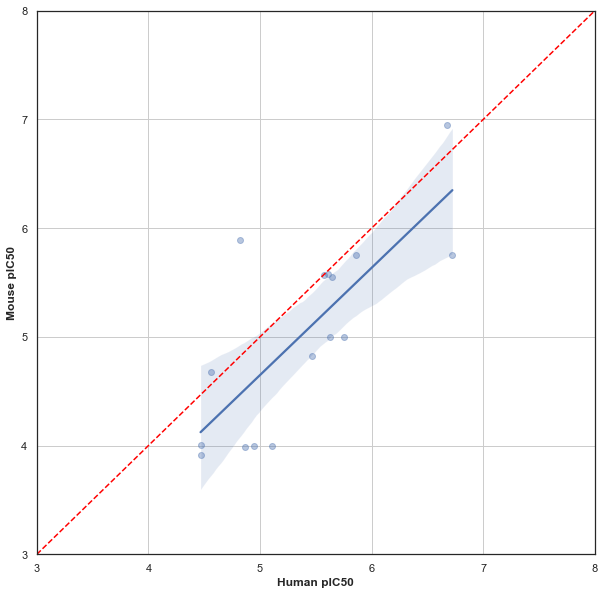

In [33]:
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=df_human_mouse['pIC50_human'], y=df_human_mouse['pIC50_mouse'], scatter_kws={'alpha':0.4})

# Add line indicating perfect correlation
ax.plot([3, 8], [3, 8], color='red', linestyle='--')

ax.set_xlabel('Human pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Mouse pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 8)
ax.set_ylim(3, 8)
ax.figure.set_size_inches(10, 10)
plt.grid()
#plt.savefig('figures/human_mouse.png')
plt.show()

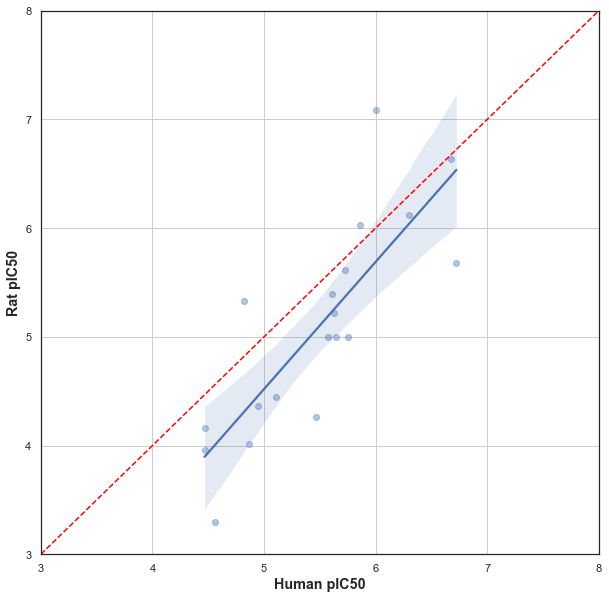

In [34]:
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=df_human_rat['pIC50_human'], y=df_human_rat['pIC50_rat'], scatter_kws={'alpha':0.4})

# Add line indicating perfect correlation
ax.plot([3, 8], [3, 8], color='red', linestyle='--')

ax.set_xlabel('Human pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Rat pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 8)
ax.set_ylim(3, 8)
ax.figure.set_size_inches(10, 10)
plt.grid()
#plt.savefig('figures/human_rat.png')
plt.show()

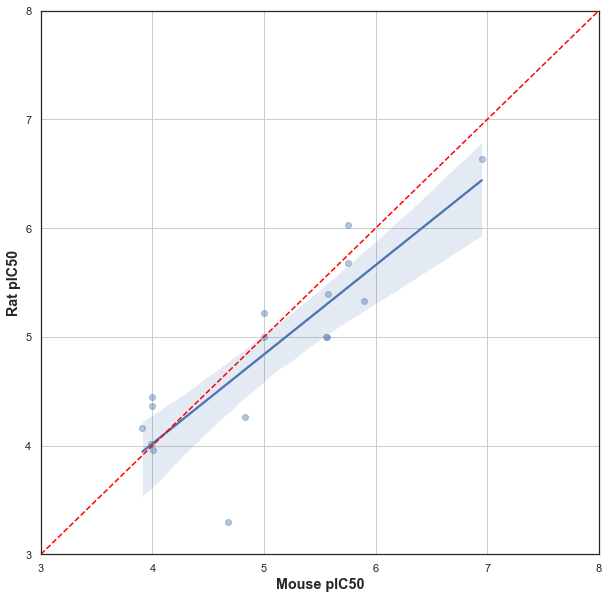

In [35]:
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=df_mouse_rat['pIC50_mouse'], y=df_mouse_rat['pIC50_rat'], scatter_kws={'alpha':0.4})

# Add line indicating perfect correlation
ax.plot([3, 8], [3, 8], color='red', linestyle='--')

ax.set_xlabel('Mouse pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Rat pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 8)
ax.set_ylim(3, 8)
ax.figure.set_size_inches(10, 10)
plt.grid()
#plt.savefig('figures/mouse_rat.png')
plt.show()